# Task 3 - To Explore Unsupervised Machine Learning
In this task we are going to predict optimum number of clusters in 'Iris' dataset and represent it visually. As it is clustering problem so we are going to use K-Means clustering algorithm so predict the clusters. Also we are going to find the appropriate number of clusters for Kmeans by using Elbow method and Silhouette coefficients method

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Loading the Dataset

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Checking for Nan / Null values

In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Checking the Statistical Description of Dataset like count, mean, standard_deviation, etc.

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Checking the Uniqueness of the Categorical Values present in the Dataset

In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Preparing the Dataset for the Fitting and Modelling the Algorithm

In [6]:
data = iris.iloc[:,:5].values
data

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

# Feature Scaling
It is done for the easy scaling of Data on the PLOT

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
scaled_features

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

 # Elbow Method
This methods shows which number of K in the Kmeans Algorithm is the best number of Cluster for the given Dataset

In [8]:
k_kwargs = {'init':'random',
           'n_init':10,
           'max_iter':300,
           'random_state':None}

#Initialize an empty list which will hold the SSE values for each iteration.
sse =[]

# Now let's iterate through 1-10 n_clusters and apply kmeans on each.
for k in range(1,11):
    # Instantiating kmeans class for each n_cluster value.
    km_elbow = KMeans(n_clusters=k, **k_kwargs)
    # Fitting the scaled features into kmeans.
    km_elbow.fit(scaled_features)
    # Appending the lowest sse value to sse list.
    sse.append(km_elbow.inertia_)
print(sse)

[749.9999999999998, 273.7275610947794, 177.05608895062977, 148.50795780759043, 123.36774906796528, 100.54568134435833, 91.60309140481147, 81.27849087474435, 74.19455098754048, 70.37337337984022]


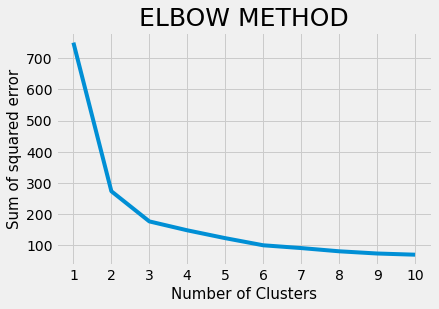

In [9]:
# Plotting the SSE curve
plt.style.use('fivethirtyeight')
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Sum of squared error',fontsize=15)
plt.title('ELBOW METHOD',fontsize = 25)
plt.grid(True)
plt.show()

Acconding to the Elbow Method, The ELBOW curves appears at K = 3

# Silhouette Coefficient Method
The Silhouette Co-efficient Method also helps us in the same manner as the Elbow Method. This method is used for an extra help for choosing the right number of Clusters.

In [10]:
k_kwargs = {'init':'random',
           'n_init':10,
           'max_iter':300,
           'random_state':None}

# Initialize the list which is going to hold value of silhouette coefficients for each k.
silhouette_coeff = []

# Start with 2 clusters otherwise silhouette score will raise an error.
for k in range(2,11):
    # Instantiating kmeans class for each n_cluster value.
    km_silhouette = KMeans(n_clusters = k, **k_kwargs)
     # Fitting the scaled features into kmeans.
    km_silhouette.fit(scaled_features)
    # Estimating the silhouette score
    score = silhouette_score(scaled_features, km_silhouette.labels_)
    # Appending the silhouette score in silhouette coefficients list 
    silhouette_coeff.append(score)

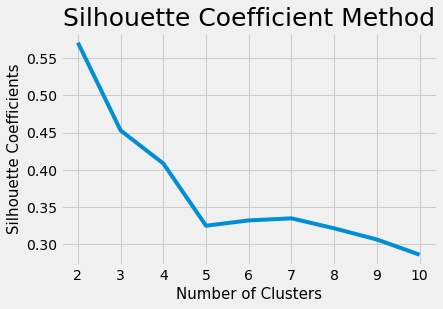

In [11]:
#Plotting the silhouette coefficients.
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters',fontsize=15)
plt.title("Silhouette Coefficient Method", fontsize=25)
plt.ylabel('Silhouette Coefficients',fontsize = 15)
plt.grid(True)
plt.show()

After Using both Elbow and Silhouette Coefficient Method, we came to the conclusion that the optimal number of Clusters for the given Dataset is 3

# Applying KMeans Algorithm

In [12]:
kmeans = KMeans(init = 'random', n_clusters = 3)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3)

# Statistics from initialization run with lowest SSE

In [13]:
#The lowest SSE value
print('The lowest SSE value is :',kmeans.inertia_)
print('-------------------------------------------------------------------------------------------------------')
#Final locations of the centroid
print('Final locations of centroid are:',kmeans.cluster_centers_)
print('========================================================================================================')
#The number of iterations required to converge
print('The number of iterations required to converge',kmeans.n_iter_)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
# Cluster Assignments
print('The cluster assignments are:',kmeans.labels_)

The lowest SSE value is : 177.05608895062977
-------------------------------------------------------------------------------------------------------
Final locations of centroid are: [[-1.1547262  -1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.14317894  1.03542672 -0.07079946  1.04224753  1.09269889]
 [ 0.07560189  0.03894137 -0.73184462  0.30676007  0.21508647]]
The number of iterations required to converge 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The cluster assignments are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [14]:
#Compute cluster centers and predict cluster index for each sample.
kmeans_fit_predict = kmeans.fit_predict(scaled_features)

# Representation Of Cluster Predictions
All the prediction is done, Now we have to show our predictions with Graphical Representations

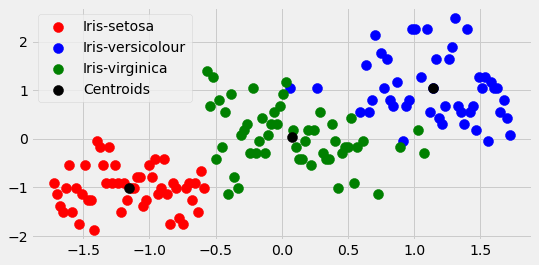

In [15]:
plt.figure(figsize = (8,4))
# Plotting the clusters using Scatter Plot
plt.scatter(scaled_features[kmeans_fit_predict == 0, 0], scaled_features[kmeans_fit_predict == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_features[kmeans_fit_predict == 1, 0], scaled_features[kmeans_fit_predict == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_features[kmeans_fit_predict == 2, 0], scaled_features[kmeans_fit_predict == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroid of each cluster distinctly
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating the model
Here we are going to use the adjusted rand index to evaluate our model. The value of adjusted rand index lies between -1 and 1. A value closer to 0 indicates random assignments and value closer to 1 indicates perfectly labeled clusters

In [16]:
from sklearn.metrics import adjusted_rand_score
# Taking the species column as true clusters in adjusted rand score.
data1 = iris.iloc[:,-1].values
ari = adjusted_rand_score(data1 ,kmeans.labels_)
print('The adjusted rand index of our Kmeans model is: ',ari)

The adjusted rand index of our Kmeans model is:  0.8681109348039796
